Cleaned Dataset

In [63]:
import pandas as pd

df = pd.read_excel("C:/Users/User/Documents/SPVM 2025/AMR_merged_all_samples_ordered.xlsx")
print(df)


              Sample_ID               Origin                         Bacteria  \
0      ASTMMSAMHMR3C2-1         APMC HALLWAY     Staphylococcus saprophyticus   
1      ASTEMSAMHDR1C2-1         APMC HALLWAY      Staphylococcus haemolyticus   
2       ASTEEFMHDR1C2-1         APMC HALLWAY             Enterococcus faecium   
3      ASTEMSAMHCR2C1-1         APMC HALLWAY             Enterococcus faecium   
4      ASTMMSAMHCR2C3-1         APMC HALLWAY            Enterococcus faecalis   
..                  ...                  ...                              ...   
273   ASTMCETOSWBR1C2-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
274   ASTMMACOSWBR1C3-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
275  ASTMMACOSWFLR5C2-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
276  ASTMMACOSWFLR5C3-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
277   ASTMMACOSWWR4C2-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   

    Unnamed: 3 +Amoxicillin

Converting Resistance outcomes to binary (spin-like states)

In [43]:
df_binary = df.copy()
for col in df.columns[3:]:
    df_binary[col] = df[col].apply(lambda x: 1 if x == "R" else 0)

print(df_binary)


              Sample_ID               Origin                         Bacteria  \
0      ASTMMSAMHMR3C2-1         APMC HALLWAY     Staphylococcus saprophyticus   
1      ASTEMSAMHDR1C2-1         APMC HALLWAY      Staphylococcus haemolyticus   
2       ASTEEFMHDR1C2-1         APMC HALLWAY             Enterococcus faecium   
3      ASTEMSAMHCR2C1-1         APMC HALLWAY             Enterococcus faecium   
4      ASTMMSAMHCR2C3-1         APMC HALLWAY            Enterococcus faecalis   
..                  ...                  ...                              ...   
273   ASTMCETOSWBR1C2-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
274   ASTMMACOSWBR1C3-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
275  ASTMMACOSWFLR5C2-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
276  ASTMMACOSWFLR5C3-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   
277   ASTMMACOSWWR4C2-1  ORMOC SURGICAL WARD  Acinetobacter baumannii complex   

     Unnamed: 3  +Amoxicill

Visualizing ward resistance distributions

C:\Users\User\AppData\Local\Temp\ipykernel_21512\184740342.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary[resistance_cols] = df_binary[resistance_cols].applymap(lambda x: 1 if str(x).strip().upper() == "R" else 0)


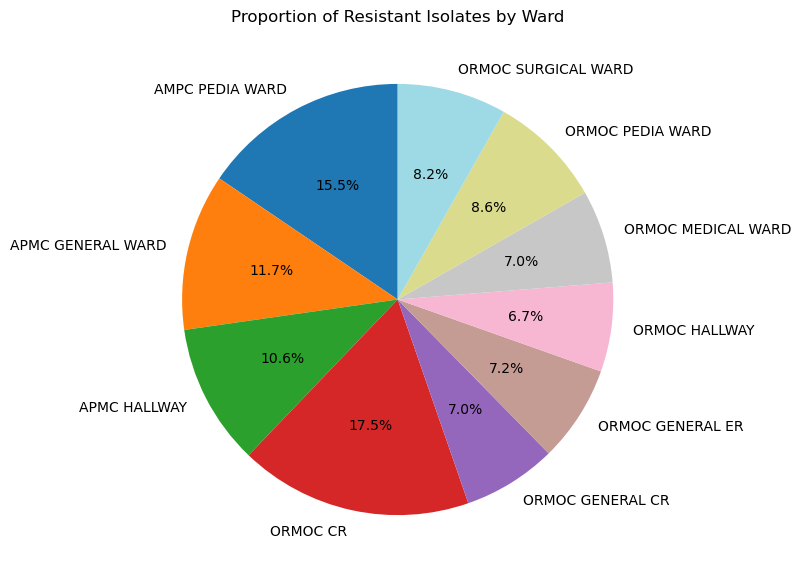

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/User/Documents/SPVM 2025/AMR_merged_all_samples_ordered.xlsx"
df = pd.read_excel(file_path)

resistance_cols = df.columns[3:]  
df_binary = df.copy()
df_binary[resistance_cols] = df_binary[resistance_cols].applymap(lambda x: 1 if str(x).strip().upper() == "R" else 0)
ward_resistance = df_binary.groupby("Origin")[resistance_cols].mean().mean(axis=1)

plt.figure(figsize=(7,7))
ward_resistance.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="tab20")
plt.title("Proportion of Resistant Isolates by Ward")
plt.ylabel("")
plt.show()


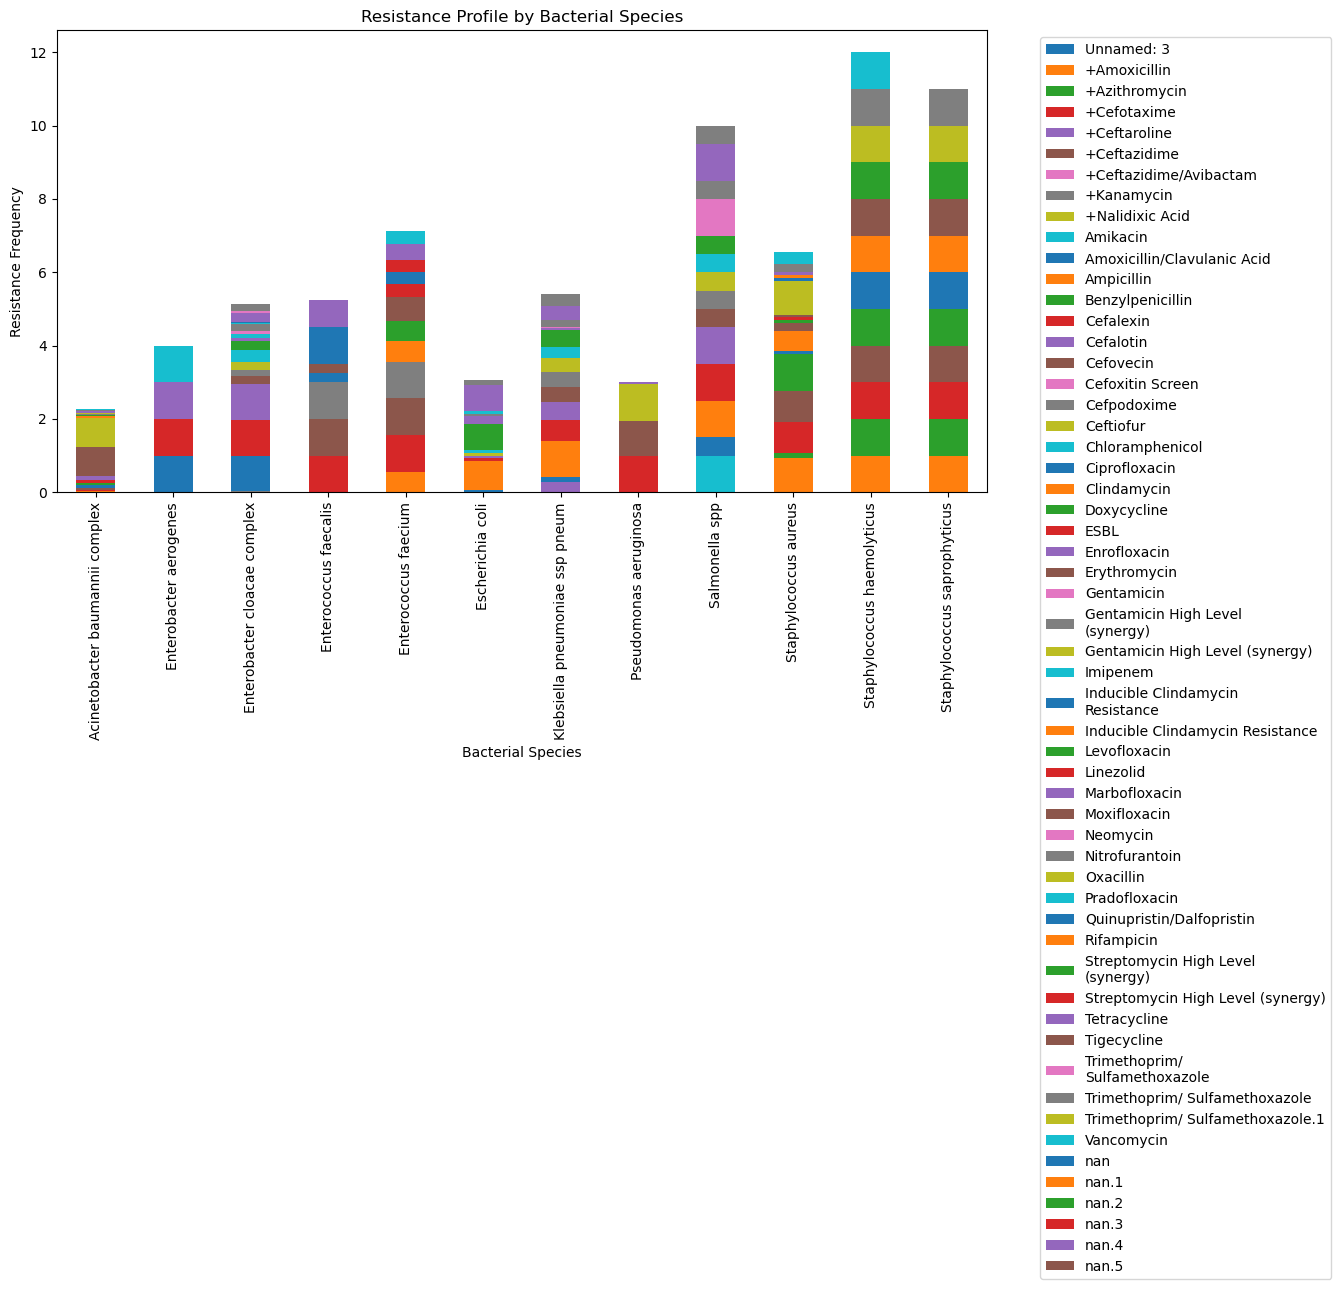

In [71]:
species_resistance = df_binary.groupby("Bacteria").mean(numeric_only=True)

species_resistance.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Resistance Profile by Bacterial Species")
plt.xlabel("Bacterial Species")
plt.ylabel("Resistance Frequency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Pearson Correlation

C:\Users\User\Documents\Anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\User\Documents\Anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


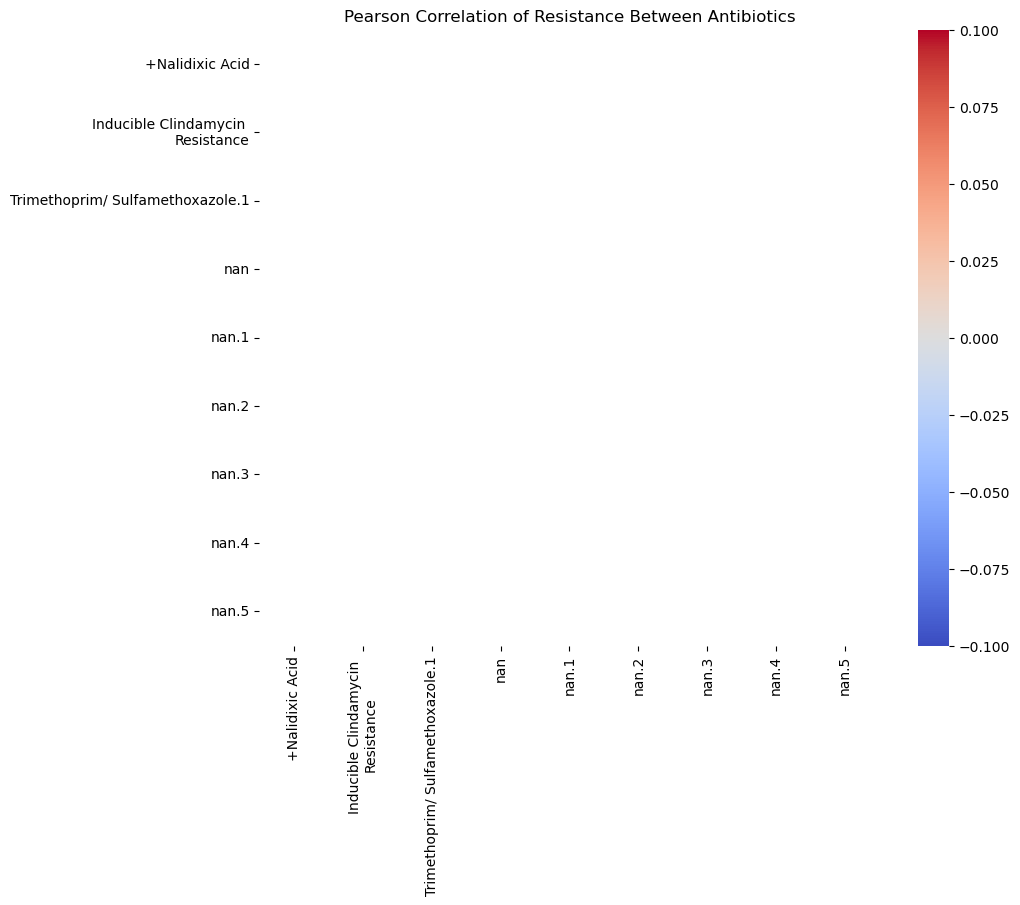

In [79]:
antibiotic_cols = df.columns[2:]
antibiotic_data = df[antibiotic_cols].select_dtypes(include=["number"])

corr_matrix = antibiotic_data.corr(method="pearson")

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Pearson Correlation of Resistance Between Antibiotics")
plt.show()



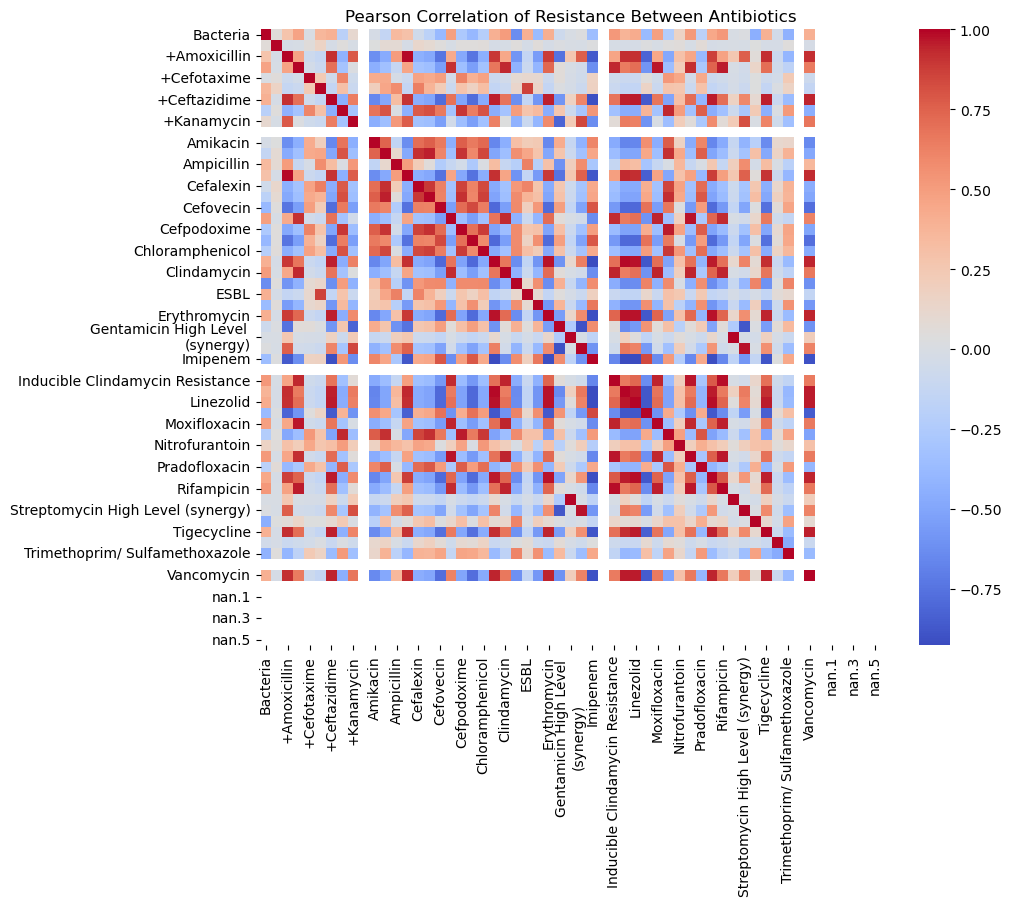

In [82]:
antibiotic_cols = df.columns[2:]

antibiotic_data = df[antibiotic_cols].copy()

for col in antibiotic_data.columns:
    if antibiotic_data[col].dtype == 'object':
        antibiotic_data[col] = antibiotic_data[col].astype('category').cat.codes

corr_matrix = antibiotic_data.corr(method="pearson")

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Pearson Correlation of Resistance Between Antibiotics")
plt.show()


Machine Learning Models 

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_excel("C:/Users/User/Documents/SPVM 2025/AMR_merged_all_samples_ordered.xlsx")

df_encoded = df.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

results = {}

for target_col in df_encoded.columns:
    X = df_encoded.drop(columns=[target_col])
    y = df_encoded[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[target_col] = acc

results_df = pd.DataFrame(list(results.items()), columns=["Antibiotic", "Accuracy"])
print(results_df.sort_values(by="Accuracy", ascending=False))


C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Skipping +Nalidixic Acid (only one class)


C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_excel("C:/Users/User/Documents/SPVM 2025/AMR_merged_all_samples_ordered.xlsx")

# Encode categorical features into numbers
df_encoded = df.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

# Features and targets
# Example: use first column as metadata (like bacteria name) → drop it from features
# If you want ALL antibiotics as targets, just shift X and y accordingly
X = df_encoded.iloc[:, :-1]   # all except last column
y = df_encoded.iloc[:, 1:]    # all except maybe ID/metadata column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build multi-output logistic regression
base_model = LogisticRegression(max_iter=1000, class_weight="balanced")
multi_model = MultiOutputClassifier(base_model)

multi_model.fit(X_train, y_train)

# Predictions
y_pred = multi_model.predict(X_test)

# Compute accuracy for each antibiotic separately
results = {}
for idx, col in enumerate(y.columns):
    acc = accuracy_score(y_test.iloc[:, idx], y_pred[:, idx])
    results[col] = acc

# Save results
results_df = pd.DataFrame(list(results.items()), columns=["Antibiotic", "Accuracy"])
print(results_df.sort_values(by="Accuracy", ascending=False))


C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\Documents\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_excel("C:/Users/User/Documents/SPVM 2025/AMR_merged_all_samples_ordered.xlsx")

# 2. Preprocess: encode categorical data
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

# 3. Define features (X) and target (y)
X = df_encoded.iloc[:, 2:-1]   # all antibiotic features except last one
y = df_encoded.iloc[:, -1]     # target = last column

# 🚨 Fix: remove rows where y has NaN
mask = y.notna()
X = X[mask]
y = y[mask]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# 6. Plot tree
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=[str(c) for c in sorted(y.unique())], 
          filled=True, rounded=True)
plt.show()

# 7. Accuracy
print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.